In [ ]:
from google.colab import drive
drive.mount('/content/drive')

100%|██████████| 4000/4000 [00:21<00:00, 188.37it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


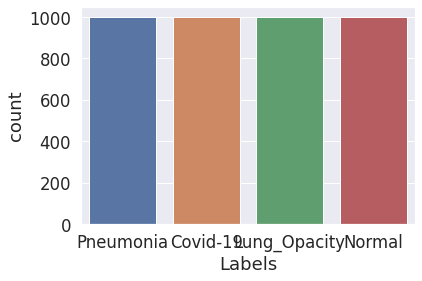

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


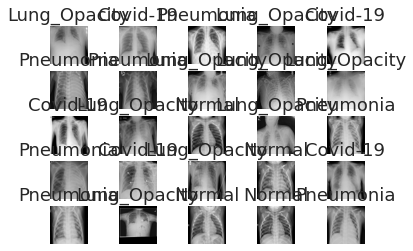

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
Test Loss is 1.4486284255981445
Test Accuracy is 0.25
Viral Pneumonia
Train classification report on train data section


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       800
Lung_Opacity    0.00000   0.00000   0.00000       800
      Normal    0.25000   1.00000   0.40000       800
   Pneumonia    0.00000   0.00000   0.00000       800

    accuracy                        0.25000      3200
   macro avg    0.06250   0.25000   0.10000      3200
weighted avg    0.06250   0.25000   0.10000      3200

Test classification report on test data section
              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       200
Lung_Opacity    0.00000   0.00000   0.00000       200
      Normal    0.25000   1.00000   0.40000       200
   Pneumonia    0.00000   0.00000   0.00000       200

    accuracy                        0.25000       800
   macro avg    0.06250   0.25000   0.10000       800
weighted avg    0.06250   0.25000   0.10000       800



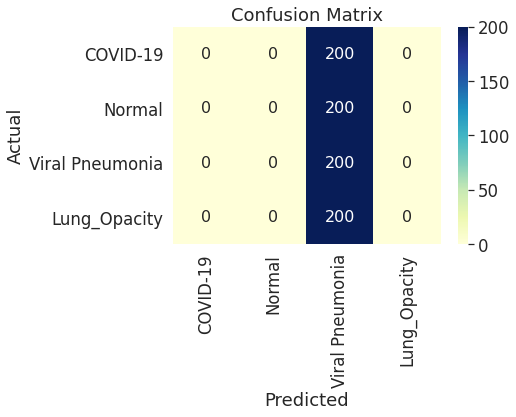

##### Plot the training testing loss and accuracy #####


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 835s 10s/step - loss: 0.4293 - acc: 0.8431 - val_loss: 3.4559 - val_acc: 0.2500
Epoch 2/10
80/80 [==============================] - 805s 10s/step - loss: 0.2606 - acc: 0.9147 - val_loss: 3.6222 - val_acc: 0.2500
Epoch 3/10
80/80 [==============================] - 804s 10s/step - loss: 0.1924 - acc: 0.9366 - val_loss: 6.7882 - val_acc: 0.2500
Epoch 4/10
80/80 [==============================] - 803s 10s/step - loss: 0.1665 - acc: 0.9419 - val_loss: 5.9689 - val_acc: 0.2850
Epoch 5/10
80/80 [==============================] - 800s 10s/step - loss: 0.1286 - acc: 0.9559 - val_loss: 3.9456 - val_acc: 0.2500
Epoch 6/10
80/80 [==============================] - 790s 10s/step - loss: 0.1135 - acc: 0.9597 - val_loss: 4.6633 - val_acc: 0.2500
Epoch 7/10
80/80 [==============================] - 789s 10s/step - loss: 0.0923 - acc: 0.9684 - val_loss: 5.6656 - val_acc: 0.2500
Epoch 8/10
80/80 [==============================] - 790s 10s/step - loss: 0.

<Figure size 432x288 with 0 Axes>

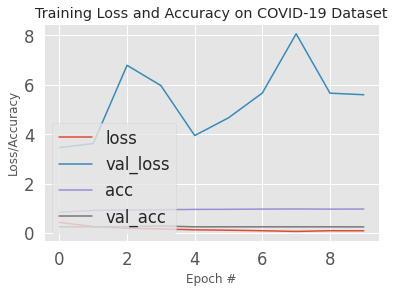

<Figure size 432x288 with 0 Axes>

In [ ]:


# -*- coding: utf-8 -*-

#Code : help:https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb#scrollTo=Cj4rXshqbQlS
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, 
# but they won't be saved outside of the current session

"""# import Libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
#      DATA PREPARATION   ######
"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
#os.listdir('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset')
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'): 
#for dirname, _, filenames in os.walk('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset'):    
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
#plt.figure(figsize=(20,20))
plt.show()
plt.savefig("ClassLevelplot.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

#plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()
plt.savefig("ImageCategoryplot.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]
######## End of data preparation #############
'''
        loss='binary_crossentropy',
        optimizer=Adam(lr=0.00005),
        metrics=['accuracy']
model = build_model()
model.summary()
'''

'''
## NasNet model #########
import matplotlib.pyplot as plt
import random
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import tensorflow as tf
import keras.backend as K
from keras.applications import Xception
from keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, BatchNormalization
from keras import Model
from keras.losses import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm import tqdm_notebook
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import *
from keras.applications import *
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import keras
from keras.models import Model
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import skimage.io
#from skimage.transform import resize
#from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score
from keras.utils import Sequence
#import skimage.io
import os
from glob import glob
from random import shuffle
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers import Convolution1D, concatenate, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
#from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
import tensorflow as tf
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
#from keras_applications import NASNetMobile, NASNetLarge, preprocess_input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from imgaug import augmenters as iaa
#import imgaug as ia
import tensorflow as tf
'''
'''
tf.keras.applications.NASNetMobile(
    input_shape=None,
    include_top=True,
    weights="None",
    input_tensor=None,
    pooling=None,
    classes=1000,
)
'''
'''
def get_model_classif_nasnet():
    inputs = Input((150, 150, 3))
    base_model = NASNetMobile(include_top=False, input_shape=(150, 150, 3))#, weights=None
    x = base_model(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(1, activation="sigmoid", name="3_")(out)
    model = Model(inputs, out)
    model.compile(optimizer=Adam(0.0001), loss=binary_crossentropy, metrics=['acc'])
    model.summary()
    return model
model = get_model_classif_nasnet()
num_classes = 4
'''

######## Efficien net #############
import os, numpy, random, pandas, seaborn
#import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                                        EarlyStopping, ReduceLROnPlateau, 
                                        TensorBoard, CSVLogger)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications.efficientnet import EfficientNetB3
#from tensorflow.keras.applications import EfficientNetB3


#import efficientnet.tfkeras as efn
#from classification_models.tfkeras import Classifiers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
image_size = 150
#keras_models_dir = "/content/drive/MyDrive/DATA/IMAGE/8.NasNet - Image net ok/NASNet-mobile-no-top.h5"
model = Sequential()
model.add(EfficientNetB3(include_top=False,weights='imagenet',pooling='avg',input_shape=(image_size,image_size,3)))
model.add(Dense(4,activation='softmax'))
#Compile the model
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ["acc"]
             )
'''
# backbone:
#efnet =  efn.EfficientNetB3(include_top=False, input_shape=(*dim, 3), weights=None)

efnet =  EfficientNetB3(include_top=False, input_shape=(150,150, 3), weights='imagenet')
#efnet.load_weights('efficientnet-b3_noisy-student_notop.h5')

# build model
model = create_model(input_dim=(150,150, 3), base_model = efnet)

# compile it.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

#model.compile(optimizer= 'adam' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])
#model = Model(base_model.input, conv1)
#model.compile(loss=bce_dice_loss, optimizer='adam', metrics=[iou_metric])
#model.compile(loss='binary_crossentropy',optimizer=Adam(1e-3))
#model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])
'''

#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


#'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training testing loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")



